In [1]:
# @title Data Loading and Initial Exploration:

In [2]:
# Instal libraries
!pip install numpy pandas matplotlib seaborn


In [3]:
# Import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [4]:
# Load the dataset from the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Students Exam score datal analysis using python/Expanded_data_with_more_features.csv")

In [5]:
# @title Data Overview and Preprocessing:

In [6]:
#Display the top 5 rows of the dataset to understand its structure.
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [7]:
#Check the summary statistics of the dataset.
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
#Check the information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [9]:
#Identify missing values in each column
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [10]:
# @title Data cleaning

In [11]:
#Change weekly study hours column
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct", "5-10")


In [12]:
#Drop unwanted column
df = df.drop('Unnamed: 0', axis=1)

In [13]:
#Overviewing data
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [14]:
# @title Exploratory Data Analysis (EDA)

[Text(0, 0, '15424'), Text(0, 0, '15217')]

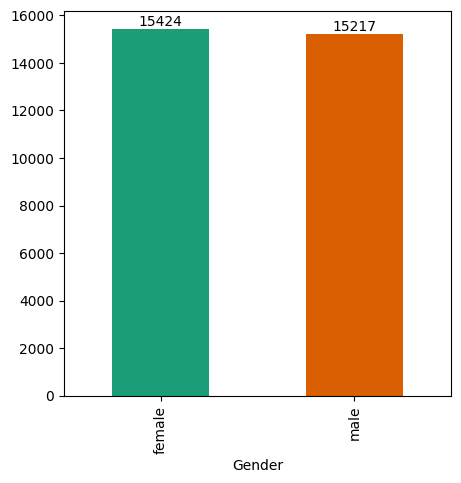

In [15]:
#Explore the distribution of gender among students.

plt.figure(figsize=(5,5))
df.groupby('Gender').size().plot(kind='bar', color=sns.color_palette('Dark2'))
plt.bar_label(plt.gca().containers[0])

In [ ]:
#From above it is clear that number of female students are slightly higher than male students.

<Axes: ylabel='ParentEduc'>

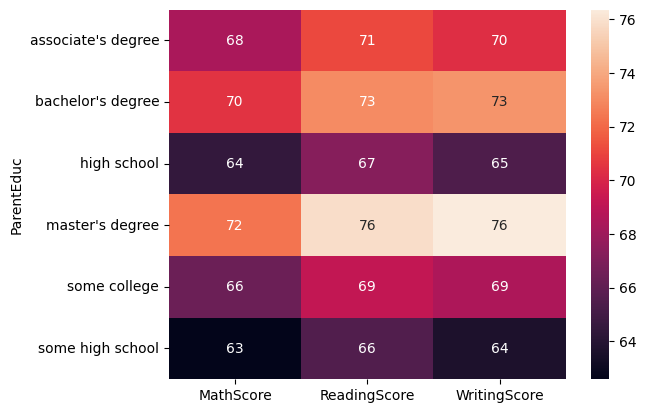

In [16]:
# Analyze the impact of parental education on students' scores.

gb = df.groupby("ParentEduc").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
sns.heatmap(gb, annot= True)


In [18]:
# The heatmap shows the average MathScore, ReadingScore, and WritingScore for students grouped by their parents' education level.
# The color intensity indicates the average score, with darker colors representing lower scores.
# In general, students with parents who have higher levels of education tend to score higher on all three subjects.

Text(0.5, 1.0, 'Parent Marital Status vs Score')

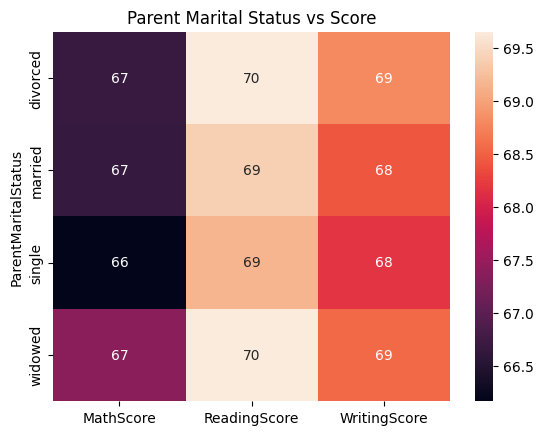

In [34]:
# Analyze the impact of parental marital status on students' scores.

gm = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
sns.heatmap(gm, annot= True)
plt.title("Parent Marital Status vs Score")

In [ ]:
# In general, parents marital status is not a major factor in students success in exam.

<Axes: xlabel='MathScore'>

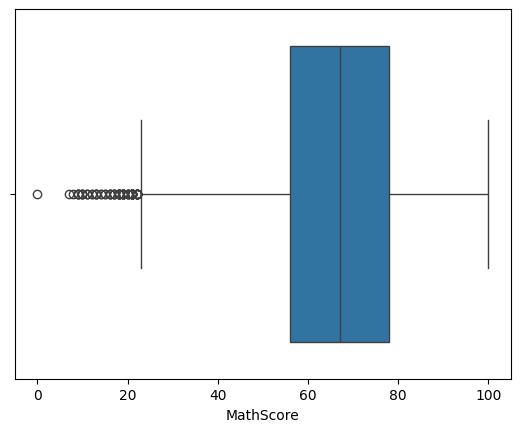

In [20]:
#Visualize the distribution of math, reading, and writing scores using boxplots
sns.boxplot(data = df, x = "MathScore")

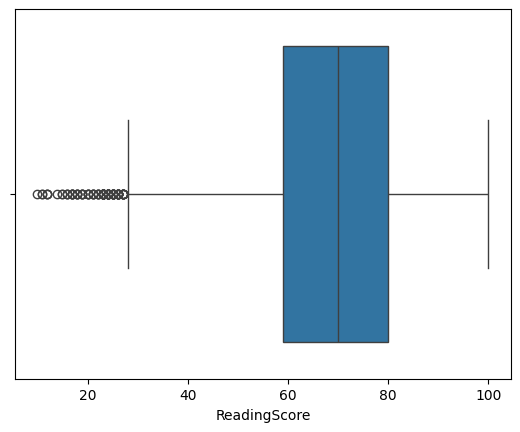

In [21]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

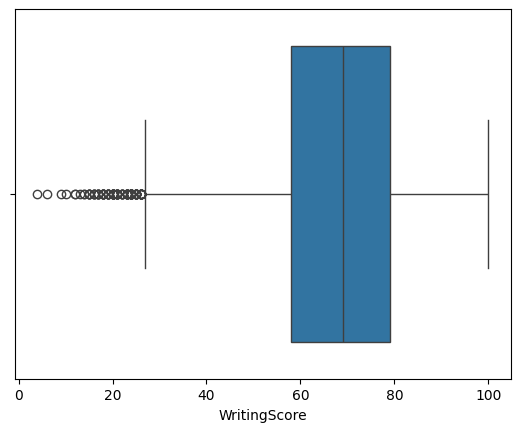

In [35]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

In [23]:
#Ethnic Group Analysis
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


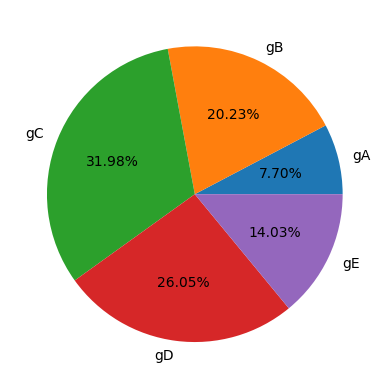

[2219, 5826, 9212, 7503, 4041]


In [22]:
# distribution of ethnic groups
gA = df.loc[(df['EthnicGroup']=="group A")].count()
gB = df.loc[(df['EthnicGroup']=="group B")].count()
gC = df.loc[(df['EthnicGroup']=="group C")].count()
gD = df.loc[(df['EthnicGroup']=="group D")].count()
gE = df.loc[(df['EthnicGroup']=="group E")].count()

l = ["gA", "gB", "gC", "gD", "gE"]
mlist = [gA["EthnicGroup"], gB["EthnicGroup"], gC["EthnicGroup"], gD["EthnicGroup"], gE["EthnicGroup"]]
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.show()
print(mlist)

In [26]:
#From above it is clear that largest group is C and the smallest ethnic group is A.

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

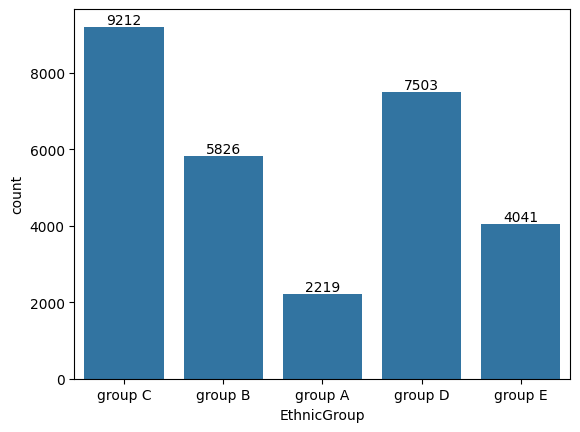

In [25]:
#Analyze the distribution of students across different ethnic groups.
ax = sns.countplot(data = df, x = "EthnicGroup")
ax.bar_label(ax.containers[0])

In [27]:
# The bar graph shows that the majority of students in the dataset belong to ethnic group C, followed by ethnic group D and ethnic group B. whereas group A has least number of students.

In [28]:
#Overviewing data
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


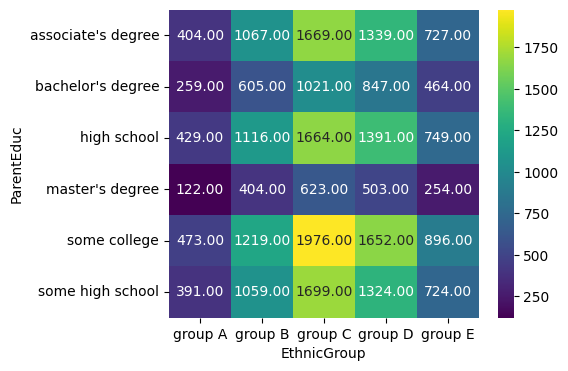

In [46]:
# @title EthnicGroup vs ParentEduc

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(5, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['ParentEduc'].value_counts()
    for x_label, grp in df.groupby('EthnicGroup')
})
sns.heatmap(df_2dhist, cmap='viridis', annot = True, fmt=".2f")
plt.xlabel('EthnicGroup')
_ = plt.ylabel('ParentEduc')

# sns.heatmap(gm, annot= True)

In [ ]:
#From above it is clear that in every category, ethnic groupC has most degrees.